In [1]:
import os
os.getcwd()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [31]:
railway_data = pd.read_excel('../COVID_complete_data.xlsx', sheet_name="RAILWAY", skiprows=1)

In [58]:
arrival_date = 'Travel Date'
departure_date = 'Journey start date'
train_id = 'Train No'
origin_district = 'Origin District'
destination_district = 'Destination District'
tmc_or_home = 'TMC/home'
age = 'Age'
gender = 'Gender'

In [569]:
nrows = railway_data.shape[0]
mydict = dict()
keys = []
row_list = []
for i in range(nrows):
    row = railway_data.loc[i]
    key = (row['Travel Date'], row[train_id], row[destination_district])
    
    if key in mydict:
        nrow = mydict[key]
    else:                
        nrow = dict()
        nrow['Arrival Date'] = row['Travel Date'].date()
        nrow['Destination District'] = row[destination_district]
        nrow['Train ID'] = row[train_id]
        nrow['Departure Date'] = row['Journey start date'].date()
        nrow['Origin District'] = row['Origin District']
        nrow['Origin State'] = row['Origin State']
        nrow['Number of passengers'] = 0
        nrow['Age group (0-14)'] = 0
        nrow['Age group (15-40)'] = 0
        nrow['Age group (41-60)'] = 0
        nrow['Age group (60+)'] = 0
        nrow['Number of males'] = 0
        nrow['Number of females'] = 0
        nrow['N_TMC_quarantined'] = 0
        nrow['N_Other_quarantined'] = 0
        mydict[key] = nrow
        row_list.append(nrow)
        

    nrow['Number of passengers'] += 1
    if row[age] <= 14:
        nrow['Age group (0-14)'] += 1
    elif row[age] <= 40:
        nrow['Age group (15-40)'] += 1
    elif row[age] <= 40:
        nrow['Age group (41-60)'] += 1
    else:
        nrow['Age group (60+)'] += 1
    if row[gender] == 'Male':
        nrow['Number of males'] += 1
    else: 
        nrow['Number of females'] += 1
    if tmc_or_home == 'TMC':
        nrow['N_TMC_quarantined'] += 1
    else:
        nrow['N_Other_quarantined'] += 1
        
        
#     print(row[3])
#     if 
#     print(row[train_id])
#     mydict[] 
    
# print(mydict)
# row = railway_data.loc[1]
# print(railway_data.loc[1,train_id])


In [20]:
def writeDFToExcel(row_list, excel_file_name, excel_sheet_name):
    df = pd.DataFrame(row_list)
    print(len(row_list))
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    writer = pd.ExcelWriter(excel_file_name, engine='xlsxwriter')

    # Convert the dataframe to an XlsxWriter Excel object.
    df.to_excel(writer, sheet_name=excel_sheet_name)

    # Close the Pandas Excel writer and output the Excel file.
    writer.save()

In [570]:
writeDFToExcel(row_list, 'covid_processed_railways.xlsx', 'Railways')

4850


In [64]:
railway_data.shape[0]
type(row[3])

pandas._libs.tslibs.timestamps.Timestamp

In [547]:
road_data = pd.read_excel('../COVID_complete_data.xlsx', sheet_name="ROADWAYS", skiprows=1)

In [565]:
vehicle_type = 'Vehicle Type'
vehicle_id = 'Vehicle No'
arrival_date = 'Checkin Date'
nrows = road_data.shape[0]
mydict = dict()
row_list = []
for i in range(nrows):
    row = road_data.loc[i]
    key = (row[vehicle_id], row[destination_district])
    
    if key in mydict:
        nrow = mydict[key]
    else:                
        nrow = dict()
        mydate = row['Checkin Date']
        if pd.isna(mydate):
            mydate = row['Journey start date']            
#             mydate = datetime.strptime(mydate,'%d-%b-%Y')
            mydate = mydate.date()        
        elif isinstance(mydate, str):
            mydate = mydate[:10]
            mydate = datetime.strptime(mydate,'%Y-%m-%d')
            mydate = mydate.date()
        else:
            mydate = mydate.date()

        nrow['Arrival Date'] = mydate
        nrow['Destination District'] = row[destination_district]
        nrow['Vehicle No'] = row[vehicle_id]
        nrow['Departure Date'] = row[departure_date].date()        
        nrow['Origin District'] = row[origin_district]
        nrow['Origin State'] = row['Origin State']
        nrow['Number of passengers'] = 0
        nrow['Age group (0-14)'] = 0
        nrow['Age group (15-40)'] = 0
        nrow['Age group (41-60)'] = 0
        nrow['Age group (60+)'] = 0
        nrow['Number of males'] = 0
        nrow['Number of females'] = 0
        nrow['N_TMC_quarantined'] = 0
        nrow['N_Other_quarantined'] = 0
        nrow['N_buses'] = 0
        nrow['N_4-Wheeler'] = 0
        nrow['N_2-Wheeler'] = 0
        
        mydict[key] = nrow
        row_list.append(nrow)
        

    nrow['Number of passengers'] += 1
    if row[age] <= 14:
        nrow['Age group (0-14)'] += 1
    elif row[age] <= 40:
        nrow['Age group (15-40)'] += 1
    elif row[age] <= 40:
        nrow['Age group (41-60)'] += 1
    else:
        nrow['Age group (60+)'] += 1
    if row[gender] == 'Male':
        nrow['Number of males'] += 1
    else: 
        nrow['Number of females'] += 1
    if tmc_or_home == 'TMC':
        nrow['N_TMC_quarantined'] += 1
    else:
        nrow['N_Other_quarantined'] += 1

    if row['Vehicle Type'] == 'Bus':
        nrow['N_buses'] += 1
    elif row['Vehicle Type'] == '4-Wheeler':
        nrow['N_4-Wheeler'] += 1
    elif row['Vehicle Type'] == '2-Wheeler':
        nrow['N_2-Wheeler'] += 1

In [566]:
writeDFToExcel(row_list, 'covid_processed_roadways.xlsx', 'Roadways')

30235


In [101]:
airways_data = pd.read_excel('../COVID_complete_data.xlsx', sheet_name="AIRWAYS-DOMESTIC", skiprows=1)

In [105]:
nrows = airways_data.shape[0]
arrival_date = 'Travel Date'
flight_id = 'Flight No'
mydict = dict()
keys = []
row_list = []
for i in range(nrows):
    row = airways_data.loc[i]
    key = (row[arrival_date], row[flight_id], row[destination_district])
    
    if key in mydict:
        nrow = mydict[key]
    else:                
        nrow = dict()
        nrow['Arrival Date'] = row[arrival_date]
        nrow['Destination District'] = row[destination_district]
        nrow['Flight ID'] = row[flight_id]
        nrow['Departure Date'] = row[departure_date]
        nrow['Origin District'] = row[origin_district]
        nrow['Number of passengers'] = 0
        nrow['Age group (0-14)'] = 0
        nrow['Age group (15-40)'] = 0
        nrow['Age group (41-60)'] = 0
        nrow['Age group (60+)'] = 0
        nrow['Number of males'] = 0
        nrow['Number of females'] = 0
        nrow['N_TMC_quarantined'] = 0
        nrow['N_Other_quarantined'] = 0
        mydict[key] = nrow
        row_list.append(nrow)
        

    nrow['Number of passengers'] += 1
    if row[age] <= 14:
        nrow['Age group (0-14)'] += 1
    elif row[age] <= 40:
        nrow['Age group (15-40)'] += 1
    elif row[age] <= 40:
        nrow['Age group (41-60)'] += 1
    else:
        nrow['Age group (60+)'] += 1
    if row[gender] == 'Male':
        nrow['Number of males'] += 1
    else: 
        nrow['Number of females'] += 1
#     if tmc_or_home == 'TMC':
#         nrow['N_TMC_quarantined'] += 1
#     else:
#         nrow['N_Other_quarantined'] += 1
    nrow['N_Other_quarantined'] += 1 # all flight passengers were home quarantined  


In [108]:
writeDFToExcel(row_list, 'covid_processed_airways.xlsx', 'Airways')

209


In [113]:
tmc_data = pd.read_excel('../COVID_complete_data.xlsx', sheet_name="TMC_full", skiprows=0)

In [116]:
tmc_data.head()

,Sl No,District,Block,TMC Name,Date,Number of people in TMC,Maximum Capacity
0,1,ANUGUL,PALALAHADA,ACCHUTANANDA A S INJID,2020-04-10,1,4
1,2,ANUGUL,PALALAHADA,ACCHUTANANDA A S INJID,2020-04-11,1,20
2,3,ANUGUL,PALALAHADA,ACCHUTANANDA A S INJID,2020-04-12,1,20
3,4,ANUGUL,PALALAHADA,ACCHUTANANDA A S INJID,2020-04-12,1,316
4,5,ANUGUL,PALALAHADA,ACCHUTANANDA A S INJID,2020-04-13,1,20


In [123]:
nrows = tmc_data.shape[0]
mydict = dict()
row_list = []
for i in range(nrows):
    row = tmc_data.loc[i]
#     print(row)
    key = (row['Date'], row['District'])
    
    if key in mydict:
        nrow = mydict[key]
    else:                
        nrow = dict()
        nrow['District'] = row['District']
        nrow['Date'] = row['Date']        
        nrow['Number of TMCs'] = 0
        nrow['Total capacity'] = 0
        nrow['Total occupancy '] = 0
        mydict[key] = nrow
        row_list.append(nrow)
        
    nrow['Number of TMCs'] += 1
    nrow['Total capacity'] += row['Maximum Capacity']
    nrow['Total occupancy '] += row['Number of people in TMC']

In [124]:
writeDFToExcel(row_list, 'covid_processed_tmc.xlsx', 'TMC_district')

179


In [143]:
covid_data = pd.read_excel('../COVID_complete_data.xlsx', sheet_name="Positive Cases", skiprows=1)

In [ ]:
nrows = covid_data.shape[0]
mydict = dict()
row_list = []
myrows = nrows
for i in range(myrows):
    row = covid_data.loc[i]
    
    key = (row['Date of  declared Positive'], row['District'])    
    if type(row['Date of  declared Positive']) != pd._libs.tslibs.timestamps.Timestamp:
        print(i, "Date is empty", row['Date of  declared Positive'])
        continue
    if row['District'] == '':
        print(i, "District is empty", row['District'])
        continue
        
    if key in mydict:
        nrow = mydict[key]
    else:                
        nrow = dict()
        nrow['District'] = row['District']
        nrow['Date'] = row['Date of  declared Positive']        
        nrow['Positive cases'] = 0
        nrow['Negative cases'] = 0
        nrow['Total positive males'] = 0
        nrow['Total positive females'] = 0        
        nrow['Age group (0-14)'] = 0
        nrow['Age group (15-40)'] = 0
        nrow['Age group (41-60)'] = 0
        nrow['Age group (60+)'] = 0
        nrow['Symptomatic'] = 0
        nrow['Asymptomatic'] = 0
        nrow['Recovered'] = 0
        nrow['Deaths'] = 0

        mydict[key] = nrow
        row_list.append(nrow)
        
    nrow['Positive cases'] += 1

    try: 
        if row[age] <= 14:
            nrow['Age group (0-14)'] += 1
        elif row[age] <= 40:
            nrow['Age group (15-40)'] += 1
        elif row[age] <= 40:
            nrow['Age group (41-60)'] += 1
        else:
            nrow['Age group (60+)'] += 1        
    except:        
        print("Exception occurred", i, row[age])
        
    if row['Sex'] == 'Male':
        nrow['Total positive males'] += 1
    else: 
        nrow['Total positive females'] += 1
    if row['Symptomatic (yes/no)'] == 'Symptomatic':
        nrow['Symptomatic'] += 1
    else: 
        nrow['Asymptomatic'] += 1

for i in range(myrows):
    row = covid_data.loc[i]
    key = (row['Recovery/Death date'], row['District'])    
    if type(row['Recovery/Death date']) != pd._libs.tslibs.timestamps.Timestamp:
        print(i, "Date is empty", row['Recovery/Death date'])
        continue
        
    if key in mydict:
        nrow = mydict[key]
        
        if row['Recovered (yes/no)'] == 'Recovered':
            nrow['Recovered'] += 1
        elif row['Recovered (yes/no)'] == 'Death':
            nrow['Deaths'] += 1
        

In [149]:
for i in range(myrows):
    row = covid_data.loc[i]
    key = (row['Recovery/Death date'], row['District'])    
    if key in mydict:
        nrow = mydict[key]
        
        if nrow['Deaths'] > 1500:
            print(i, nrow['Date'], nrow['District'], nrow)
            

In [160]:
writeDFToExcel(row_list, 'covid_processed_covid.xlsx', 'COVID')

1883


In [156]:
row = covid_data.loc[1]
type(row['Recovery/Death date'])
type(row['Recovery/Death date']) == pd._libs.tslibs.timestamps.Timestamp

True

In [ ]:
import openpyxl

directory = '../district level data'
row_list = []
i = 0
filename = ''
for filename in os.listdir(directory):
    i += 1    
    print("Doing",i,filename)
#     if i > 1:
#         break
    if filename.endswith(".xlsx"):
        book = openpyxl.load_workbook(directory+'/'+filename)
        sheet = book.active
        nrow = dict()
        nrow['District'] = filename[:-5]
        nrow['Area'] = 0
        nrow['Population'] = 0
        nrow['Sex Ratio (Number of females per 1000 males) - Total'] = sheet['E5'].value
        nrow['Sex Ratio (Number of females per 1000 males) - Rural'] = sheet['H5'].value
        nrow['Sex Ratio (Number of females per 1000 males) - Urban'] = sheet['K5'].value
        nrow['Total Literacy Rate'] = sheet['F31'].value
        nrow['Male Literacy Rate'] = sheet['I31'].value
        nrow['Female Literacy Rate'] = sheet['L31'].value
        nrow['Net enrollment (Primary)'] = sheet['E34'].value
        nrow['Net enrollment (Upper-Primary)'] = sheet['I34'].value
        nrow['Drop out rate (Primary)'] = sheet['E35'].value
        nrow['Drop out rate (Upper-Primary)'] = sheet['I35'].value
        totalHouseholds = sheet['E48'].value
        ruralHouseholds = sheet['H48'].value
        urbanHouseholds = sheet['K48'].value
        nrow['Total Households in District'] = totalHouseholds
        nrow['Rural Households in District'] = ruralHouseholds
        nrow['Urban Households in District'] = urbanHouseholds
        nrow['Total Households with no lighting (in %)'] = sheet['F52'].value / totalHouseholds * 100
        nrow['Rural Households with no lighting (in %)'] = sheet['I52'].value / ruralHouseholds * 100
        nrow['Urban Households with no lighting (in %)'] = sheet['L52'].value / urbanHouseholds * 100
        nrow['Total Households receiving untreated tap water within premises (in %)'] = sheet['F60'].value / totalHouseholds * 100
        nrow['Rural Households receiving untreated tap water within premises (in %)'] = sheet['I60'].value / ruralHouseholds * 100
        nrow['Urban Households receiving untreated tap water within premises (in %)'] = sheet['L60'].value / urbanHouseholds * 100
        nrow['Total Households with mobile phone (%)'] = sheet['E64'].value
        nrow['Rural Households with mobile phone (%)'] = sheet['H64'].value
        nrow['Urban Households with mobile phone (%)'] = sheet['K64'].value
        nrow['Total Households with computer/laptop with internet connection (%)'] = sheet['E65'].value
        nrow['Rural Households with computer/laptop with internet connection (%)'] = sheet['H65'].value
        nrow['Urban Households with computer/laptop with internet connection (%)'] = sheet['K65'].value
        
        row_list.append(nrow)
    else:
        continue
    
    print("Done",i,filename)

In [188]:
writeDFToExcel(row_list, 'covid_processed_confounder.xlsx', 'Confounders')

29


In [ ]:
directory = '../district level data'
row_list = []
i = 0
filename = ''
for filename in os.listdir(directory):
    i += 1    
    print("Doing",i,filename)

In [191]:
districts = pd.read_csv('../data/Districts.csv')
districts.head()

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,2679.0
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN


In [192]:
odisha_districts = districts[districts['State'] =='Odisha']
odisha_districts.head()

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
242,2020-04-26,Odisha,Balasore,10,0,0,0,NaN
243,2020-04-26,Odisha,Bhadrak,16,2,0,0,NaN
244,2020-04-26,Odisha,Cuttack,1,1,0,0,NaN
245,2020-04-26,Odisha,Dhenkanal,1,1,0,0,NaN
246,2020-04-26,Odisha,Jajpur,18,1,0,0,NaN


In [347]:
districts = pd.read_excel('../data/Districts_new.xlsx')


In [271]:
test_data = pd.read_excel('../COVID_complete_data.xlsx', sheet_name="Number of Tests Done", skiprows=0)

In [348]:
nrows = districts.shape[0]
mydict = dict()
row_list = []
myrows = nrows
for i in range(myrows):
    row = districts.loc[i]
    if row['State'] != 'Odisha':
        continue
    
    key = row['Date']
    key = key.date()
    if key in mydict:
        nrow = mydict[key]
    else:                
        nrow = dict()
        nrow['Date'] = key
#         nrow['Positive cases'] = 0
        nrow['Recovered'] = 0
        nrow['Deceased'] = 0
#         nrow['Total Tested'] = 0
#         nrow['Negative cases'] = 0
        nrow['Train passengers'] = 0
        nrow['Road passengers'] = 0
        nrow['Air passengers'] = 0
        nrow['Total_TMC_capacity'] = 0
        nrow['Total_TMC_occupants'] = 0
        mydict[key] = nrow
        row_list.append(nrow)
    
#     nrow['Positive cases'] += row['Confirmed']
    nrow['Recovered'] += row['Recovered']
    nrow['Deceased'] += row['Deceased']

nrows = test_data.shape[0]
myrows = nrows
for i in range(myrows-3):
    row = test_data.loc[i]
    key = row['Date/District']
    try:
        key = key.date()
    except:
        print(i, key)
    if key in mydict:        
        nrow = mydict[key]
        nrow['Total Tested'] = row['Total Testing']
        nrow['Positive cases'] = row['Total Positive']
        nrow['Negative cases'] = row['Total Negative']
    
    
print(len(row_list))


105


In [344]:
processed_railway_data = pd.read_excel('covid_processed.xlsx',sheet_name='Railways')
nrows = processed_railway_data.shape[0]
myrows = nrows
for i in range(myrows):
    row = processed_railway_data.loc[i]
    key = row['Arrival Date']
    try:
        key = key.date()
    except:
        print("rail",i, key)
    if key in mydict:        
        nrow = mydict[key]
        nrow['Train passengers'] += row['Number of passengers']
processed_roadway_data = pd.read_excel('covid_processed.xlsx',sheet_name='Roadways')
nrows = processed_roadway_data.shape[0]
myrows = nrows
for i in range(myrows):
    row = processed_roadway_data.loc[i]
    key = row['Arrival Date']
    try:
        key = key.date()
    except:
        print("road",i, key)
    if key in mydict:        
        nrow = mydict[key]
        nrow['Road passengers'] += row['Number of passengers']
processed_airway_data = pd.read_excel('covid_processed.xlsx',sheet_name='Airways')
nrows = processed_airway_data.shape[0]
myrows = nrows
for i in range(myrows):
    row = processed_airway_data.loc[i]
    key = row['Arrival Date']
    try:
        key = key.date()
    except:
        print("air",i, key)
    if key in mydict:        
        nrow = mydict[key]
        nrow['Air passengers'] += row['Number of passengers']
print(len(row_list))

111


In [345]:
processed_tmc_data = pd.read_excel('covid_processed.xlsx',sheet_name='TMC_district')
nrows = processed_tmc_data.shape[0]
myrows = nrows
for i in range(myrows):
    row = processed_tmc_data.loc[i]
    key = row['Date']
    try:
        key = key.date()
    except:
        print("tmc",i, key)
    if key in mydict:        
        nrow = mydict[key]
        nrow['Total_TMC_capacity'] += row['Total capacity']
        nrow['Total_TMC_occupants'] += row['Total occupancy ']


In [346]:
writeDFToExcel(row_list, 'covid_processed_odisha.xlsx', 'Odisha')

111


In [224]:
test_data.head()

,Date/District,Total Testing,Total Negative,Total Positive,Balasore,Bhadrak,Cuttack,Dhenkaname,Jajpur,Kalahandi,...,Malkangiri,Sambalpur,Nuapada,Bargarh,Gajapati,Nawarangpur,Sonepur,Rayagada,Sundargarh,Others
0,2020-08-10 00:00:00,23035.0,21694.0,1341.0,54.0,83.0,76.0,14.0,15.0,25.0,...,17.0,26.0,7.0,56.0,20.0,6.0,14.0,75.0,91.0,NaN
1,2020-08-09 00:00:00,19083.0,17555.0,1528.0,43.0,70.0,72.0,107.0,33.0,31.0,...,38.0,168.0,2.0,10.0,31.0,23.0,5.0,27.0,126.0,NaN
2,2020-08-08 00:00:00,16093.0,14359.0,1734.0,73.0,58.0,177.0,29.0,38.0,24.0,...,52.0,14.0,22.0,51.0,85.0,13.0,13.0,18.0,126.0,NaN
3,2020-08-07 00:00:00,17444.0,15801.0,1643.0,73.0,2.0,98.0,36.0,36.0,30.0,...,27.0,112.0,1.0,7.0,35.0,5.0,0.0,136.0,118.0,NaN
4,2020-08-06 00:00:00,16055.0,14222.0,1833.0,69.0,50.0,124.0,43.0,60.0,84.0,...,36.0,39.0,1.0,8.0,35.0,11.0,33.0,152.0,110.0,NaN


In [320]:
import math
processed_roadway_data = pd.read_excel('covid_processed_roadways.xlsx',sheet_name='Roadways')
nrows = processed_roadway_data.shape[0]
myrows = nrows
nrow_list = []
for i in range(myrows):
    row = processed_roadway_data.loc[i]
    key = row['Arrival Date']
#     print(i, key, type(key), isinstance(key, str))
    if pd.isna(key):
        key = row['Departure Date']        
#         print(i, key, type(key), isinstance(key, str))
        key = datetime.strptime(key,'%d-%b-%Y')
        key = key.date()
        
    elif isinstance(key, str):
        key = key[:10]
        key = datetime.strptime(key,'%Y-%m-%d')
        key = key.date()
    nrow = dict()
    nrow['Arrival Date'] = key
    nrow['Destination District'] = row['Destination District']
    nrow['Vehicle No'] = row['Vehicle No']
    departureDate = row['Departure Date']
    if isinstance(departureDate,str):
        departureDate = datetime.strptime(departureDate,'%d-%b-%Y')
        departureDate = departureDate.date()
    nrow['Departure Date'] = departureDate
    nrow['Origin District'] = row['Origin District']
    nrow['Number of passengers'] = row['Number of passengers']
    nrow['Age group (0-14)'] = row['Age group (0-14)']
    nrow['Age group (15-40)'] = row['Age group (15-40)']
    nrow['Age group (41-60)'] = row['Age group (41-60)']
    nrow['Age group (60+)'] = row['Age group (60+)']
    nrow['Number of males'] = row['Number of males']
    nrow['Number of females'] = row['Number of females']
    nrow['N_TMC_quarantined'] = row['N_TMC_quarantined']
    nrow['N_Other_quarantined'] = row['N_Other_quarantined']
    nrow['N_buses'] = row['N_buses']
    nrow['N_private_vehicle'] = row['N_private_vehicle']
    nrow_list.append(nrow)
print(len(nrow_list))

6678


In [322]:
writeDFToExcel(nrow_list, 'covid_processed_roadways_new.xlsx', 'Roadways')

6678


In [286]:
key = processed_roadway_data.loc[0]['Arrival Date']
print(key,type(key))
key = key[:10]
print(key,type(key))
key = datetime.strptime(key,'%Y-%m-%d')
print(key,type(key))
key = key.date()
print(key,type(key))

2020-05-15 01:46:13.057 <class 'str'>
2020-05-15 <class 'str'>
2020-05-15 00:00:00 <class 'datetime.datetime'>
2020-05-15 <class 'datetime.date'>


In [251]:
from datetime import datetime
date_time_str = districts.loc[1]['Date']
date = datetime.strptime(date_time_str,'%d-%m-%y')

print(date, type(date))


ValueError: time data '26-Apr-20' does not match format '%d-%m-%y'

In [15]:
someOdishaDistricts = ['Ganjam','Cuttack']

In [264]:
# import xlrd
# xlsx = xlrd.open_workbook(r'../data/Districts_new.xlsx', on_demand=True)
# print(xlsx.sheet_names())

districts = pd.read_excel('../data/Districts_new.xlsx',sheet_name="Sheet1", skiprows=0)

In [268]:
districts.head()
ndate = districts.loc[0]['Date']
print(ndate,type(ndate))
ndate = ndate.date()
print(ndate,type(ndate))

2020-04-26 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-04-26 <class 'datetime.date'>


In [4]:
odisha_daily = pd.read_excel('covid_processed.xlsx',sheet_name="Odisha", skiprows=0)

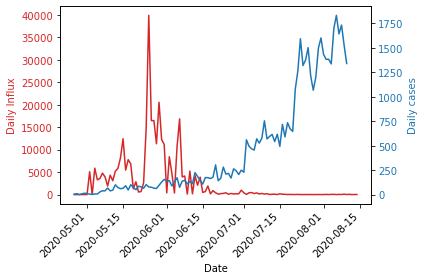

In [5]:
od = odisha_daily
dates = od['Date']
n_daily_influx = od['Train passengers'] + od['Road passengers'] + od['Air passengers']
len(n_daily_influx)
n_daily_cases = od['Positive cases']
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Influx', color=color)
ax1.plot(dates, n_daily_influx, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(dates, rotation = 45, ha="right")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Daily cases', color=color)  # we already handled the x-label with ax1
ax2.plot(dates, n_daily_cases, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
processed_railway_data = pd.read_excel('covid_processed.xlsx',sheet_name='Railways')
processed_airway_data = pd.read_excel('covid_processed.xlsx',sheet_name='Airways')
processed_roadway_data = pd.read_excel('covid_processed.xlsx',sheet_name='Roadways')

In [372]:
# imp_districts = ['Ganjam', 'Khordha', 'Cuttack', 'Sundargarh', 'Rayagada']
nrows = districts.shape[0]
imp_district = 'Rayagada'
mydict = dict()
row_list = []
myrows = nrows
for i in range(myrows):
    row = districts.loc[i]
    if row['State'] != 'Odisha' and row['District'].lower() != imp_district.lower():
        continue
    
    key = row['Date']
    key = key.date()
    if key in mydict:
        nrow = mydict[key]
    else:                
        nrow = dict()
        nrow['Date'] = key
        nrow['Positive cases'] = 0
        nrow['Recovered'] = 0
        nrow['Deceased'] = 0
#         nrow['Total Tested'] = 0
#         nrow['Negative cases'] = 0
        nrow['Train passengers'] = 0
        nrow['Road passengers'] = 0
        nrow['Air passengers'] = 0
        nrow['Total_TMC_capacity'] = 0
        nrow['Total_TMC_occupants'] = 0
        mydict[key] = nrow
        row_list.append(nrow)
    
#     nrow['Positive cases'] += row['Confirmed']
    nrow['Recovered'] += row['Recovered']
    nrow['Deceased'] += row['Deceased']

nrows = test_data.shape[0]
myrows = nrows
for i in range(myrows-3):
    row = test_data.loc[i]
    key = row['Date/District']
    try:
        key = key.date()
    except:
        print(i, key)
    if key in mydict:        
        nrow = mydict[key]
        nrow['Positive cases'] = row[imp_district]
        
    
print(len(row_list))

nrows = processed_railway_data.shape[0]
print(nrows)
myrows = nrows
for i in range(myrows):
    row = processed_railway_data.loc[i]
#     print(row['Destination District'], imp_district)
    if row['Destination District'].lower() != imp_district.lower():
        continue
    key = row['Arrival Date']
    try:
        key = key.date()
    except:
        print("rail",i, key)
    if key in mydict:        
        nrow = mydict[key]
        nrow['Train passengers'] += row['Number of passengers']
#         print(nrow['Train passengers'])
    else:
        print(i, key)

nrows = processed_roadway_data.shape[0]
myrows = nrows
for i in range(myrows):
    row = processed_roadway_data.loc[i]
    if row['Destination District'].lower() != imp_district.lower():
        continue
    key = row['Arrival Date']
    try:
        key = key.date()
    except:
        print("road",i, key)
    if key in mydict:        
        nrow = mydict[key]
        nrow['Road passengers'] += row['Number of passengers']

nrows = processed_airway_data.shape[0]
myrows = nrows
for i in range(myrows):
    row = processed_airway_data.loc[i]
    if row['Destination District'].lower() != imp_district.lower():
        continue
    
    key = row['Arrival Date']
    try:
        key = key.date()
    except:
        print("air",i, key)
    if key in mydict:        
        nrow = mydict[key]
        nrow['Air passengers'] += row['Number of passengers']
print(len(row_list))

processed_tmc_data = pd.read_excel('covid_processed.xlsx',sheet_name='TMC_district')
nrows = processed_tmc_data.shape[0]
myrows = nrows
for i in range(myrows):
    row = processed_tmc_data.loc[i]
    if row['District'].lower() != imp_district.lower():
        continue

    key = row['Date']
    try:
        key = key.date()
    except:
        print("tmc",i, key)
    if key in mydict:        
        nrow = mydict[key]
        nrow['Total_TMC_capacity'] += row['Total capacity']
        nrow['Total_TMC_occupants'] += row['Total occupancy ']

writeDFToExcel(row_list, 'covid_processed_'+imp_district+'.xlsx', imp_district)

111
4850
111
111


In [358]:
writeDFToExcel(row_list, 'covid_processed_'+imp_district+'.xlsx', imp_district)

111


In [362]:
row_list[50]['Train passengers']

0

In [415]:
railway_data = pd.read_excel('../COVID_complete_data.xlsx', sheet_name="RAILWAY", skiprows=1)
road_data = pd.read_excel('../COVID_complete_data.xlsx', sheet_name="ROADWAYS", skiprows=1)

In [443]:
# import pandasql
# print(type(railway_data))
# origin_state = 'Origin State'
stateList = pandasql.sqldf('SELECT DISTINCT "ORIGIN STATE" FROM railway_data')

stateList2 = pandasql.sqldf('SELECT DISTINCT "ORIGIN STATE" FROM road_data')
print(stateList2)
states = set([])
for i in range(stateList.shape[0]):
    row = stateList.loc[i]
    if row['Origin State'] != 'None':
        states.add(row['Origin State'])
for i in range(stateList2.shape[0]):
    row = stateList2.loc[i]
    if row['Origin State'] != 'None':
        states.add(row['Origin State'])
print(states)

                   Origin State
0                ANDHRA PRADESH
1                     JHARKHAND
2                    TAMIL NADU
3                   MAHARASHTRA
4                  CHHATTISGARH
5                   WEST BENGAL
6                     KARNATAKA
7                       GUJARAT
8                MADHYA PRADESH
9                     TELANGANA
10                UTTAR PRADESH
11                        BIHAR
12                    RAJASTHAN
13                       PUNJAB
14                        ASSAM
15                        DELHI
16                      HARYANA
17                  UTTARAKHAND
18                          GOA
19                       KERALA
20            JAMMU AND KASHMIR
21                       SIKKIM
22             HIMACHAL PRADESH
23                   PUDUCHERRY
24                     NAGALAND
25                   CHANDIGARH
26                DAMAN AND DIU
27                    MEGHALAYA
28                      TRIPURA
29       DADRA AND NAGAR HAVELI
30      

In [444]:
odishaDistrictList = pandasql.sqldf('SELECT DISTINCT "Destination District" FROM railway_data')

odishaDistrictList2 = pandasql.sqldf('SELECT DISTINCT "Destination District" FROM road_data')

odisha_districts = set([])
for i in range(odishaDistrictList.shape[0]):
    row = odishaDistrictList.loc[i]
    if row['Destination District'] != 'None':
        odisha_districts.add(row['Destination District'])
for i in range(odishaDistrictList2.shape[0]):
    row = odishaDistrictList2.loc[i]
    if row['Destination District'] != 'None':
        odisha_districts.add(row['Destination District'])
print(odisha_districts)

{'NUAPADA', 'JAGATSINGHAPUR', 'NAYAGARH', 'SONEPUR', 'GANJAM', 'SAMBALPUR', 'CUTTACK', 'NABARANGPUR', 'KHORDHA', 'KENDRAPARA', 'GAJAPATI', 'JHARSUGUDA', 'BALESHWAR', 'KALAHANDI', 'RAYAGADA', 'DEOGARH', 'BOUDH', 'BARGARH', 'SUNDARGARH', 'KENDUJHAR', 'MALKANGIRI', 'PURI', 'BALANGIR', 'KANDHAMAL', 'MAYURBHANJ', 'KORAPUT', 'ANUGUL', 'DHENKANAL', 'BHADRAK', 'JAJAPUR'}


In [10]:
states = set([])
odisha_districts = set([])
from datetime import timedelta, date
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)
start_dt = date(2020, 3, 6)
end_dt = date(2020, 8, 25)
dates = []
for dt in daterange(start_dt, end_dt):
    dates.append(dt)
print(len(dates), dates[0], dates[len(dates)-1])
# mydict = dict()

173 2020-03-06 2020-08-25


In [525]:
mydict = dict()
arrival_date = 'Journey start date'
nrows = road_data.shape[0]

mydict = dict()
myrows = 2
row_list = []
for state in states:
    print(state)
    if state == 'NEPAL' or state == 'None':
        continue
    for odistrict in odisha_districts:
        for mydate in dates:
            key = (mydate, odistrict, state)
            nrow = dict()
            nrow['Arrival Date'] = mydate
            nrow['Destination District'] = odistrict
            nrow['Origin State'] = state
            nrow['Number of passengers'] = 0
            nrow['Train passengers'] = 0
            nrow['Age group (0-14)'] = 0
            nrow['Age group (15-40)'] = 0
            nrow['Age group (41-60)'] = 0
            nrow['Age group (60+)'] = 0
            nrow['Number of males'] = 0
            nrow['Number of females'] = 0
            nrow['N_TMC_quarantined'] = 0
            nrow['N_Other_quarantined'] = 0
            nrow['N_buses'] = 0
            nrow['N_4-Wheeler'] = 0
            nrow['N_2-Wheeler'] = 0

            mydict[key] = nrow
            row_list.append(nrow)
            
# writeDFToExcel(row_list, 'check.xlsx', 'econometrics')

NAGALAND
PUNJAB
TELANGANA
ANDHRA PRADESH
JHARKHAND
SIKKIM
GUJARAT
WEST BENGAL
DADRA AND NAGAR HAVELI
GOA
LAKSHADWEEP
MEGHALAYA
UTTARAKHAND
BIHAR
NEPAL
HIMACHAL PRADESH
LADAKH
RAJASTHAN
MAHARASHTRA
JAMMU AND KASHMIR
None
PUDUCHERRY
HARYANA
ASSAM
MANIPUR
MIZORAM
KERALA
CHHATTISGARH
DELHI
KARNATAKA
ARUNACHAL PRADESH
TRIPURA
MADHYA PRADESH
CHANDIGARH
TAMIL NADU
ANDAMAN AND NICOBAR ISLANDS
UTTAR PRADESH
DAMAN AND DIU


In [526]:
print(len(road_data), len(railway_data), len(row_list))

87316 292932 192030


In [528]:
vehicle_type = 'Vehicle Type'
vehicle_id = 'Vehicle No'
arrival_date = 'Journey start date'
nrows = road_data.shape[0]

# mydict = dict()
myrows = 2
# row_list = []
for i in range(nrows):
    row = road_data.loc[i]
    mydate = row[arrival_date]
    try:
#         mydate = convertStrDateToDate(mydate)
        mydate = mydate.date()
    except:
        mydate = row['Journey start date']
        mydate = convertJourneyStartDateToDate(mydate)
#     print(mydate,type(mydate))
    
    key = (mydate, row[destination_district], row['Origin State'])
    
    if key in mydict:
#         print(i, mydate)
        nrow = mydict[key]        

        nrow['Number of passengers'] += 1
        if row[age] <= 14:
            nrow['Age group (0-14)'] += 1
        elif row[age] <= 40:
            nrow['Age group (15-40)'] += 1
        elif row[age] <= 40:
            nrow['Age group (41-60)'] += 1
        else:
            nrow['Age group (60+)'] += 1
        if row[gender] == 'Male':
            nrow['Number of males'] += 1
        else: 
            nrow['Number of females'] += 1
        if row['TMC/Home'] == 'TMC':
            nrow['N_TMC_quarantined'] += 1
        else:
            nrow['N_Other_quarantined'] += 1

        if row['Vehicle Type'] == 'Bus':
            nrow['N_buses'] += 1
        elif row['Vehicle Type'] == '4-Wheeler':
            nrow['N_4-Wheeler'] += 1
        elif row['Vehicle Type'] == '2-Wheeler':
            nrow['N_2-Wheeler'] += 1
        
    
arrival_date = 'Travel Date'
nrows = railway_data.shape[0]
for i in range(nrows):
    row = railway_data.loc[i]
    mydate = row[arrival_date]
    mydate = mydate.date()
    key = (mydate, row[destination_district], row['Origin State'])
    
    if key in mydict:
        nrow = mydict[key]
        nrow['Number of passengers'] += 1
        nrow['Train passengers'] += 1
        if row[age] <= 14:
            nrow['Age group (0-14)'] += 1
        elif row[age] <= 40:
            nrow['Age group (15-40)'] += 1
        elif row[age] <= 40:
            nrow['Age group (41-60)'] += 1
        else:
            nrow['Age group (60+)'] += 1
        if row[gender] == 'Male':
            nrow['Number of males'] += 1
        else: 
            nrow['Number of females'] += 1
        if row['TMC/home'] == 'TMC':
            nrow['N_TMC_quarantined'] += 1
        else:
            nrow['N_Other_quarantined'] += 1

In [529]:
writeDFToExcel(row_list, 'covid_processed_econometrics_new.xlsx', 'econometrics')

192030


In [12]:
from datetime import datetime
def convertStrDateToDate(key):
#     key = nrow['Arrival Date']
    key = key[:10]
#     print(key,type(key))
    key = datetime.strptime(key,'%Y-%m-%d')
#     print(key,type(key))
    key = key.date()
#     print(key,type(key))
    return key
key = '2020-05-15 01:46:13.057'
print(key,type(key), isinstance(key,str))
key = convertStrDateToDate(key)
print(key,type(key))

def convertJourneyStartDateToDate(key):
#     key = nrow['Arrival Date']
#     key = key[:11]
#     print(key,type(key))
    key = datetime.strptime(key,'%d-%b-%Y')
#     print(key,type(key))
    key = key.date()
#     print(key,type(key))
    return key

key = '14-Jun-2020'
key = convertJourneyStartDateToDate(key)
print(key,type(key))


2020-05-15 01:46:13.057 <class 'str'> True
2020-05-15 <class 'datetime.date'>
2020-06-14 <class 'datetime.date'>


In [387]:
railway_data.loc[0]['Travel Date'].date()

datetime.date(2020, 5, 17)

In [403]:
key = road_data.loc[0]['Checkin Date']
print(key, type(key))
key = convertStrDateToDate(key)
print(key, type(key))
key = railway_data.loc[0]['Travel Date']

2020-05-15 01:46:13.057 <class 'str'>
2020-05-15 <class 'datetime.date'>


In [13]:
influx = 

SyntaxError: invalid syntax (<ipython-input-13-9b7347eaf373>, line 1)

In [4]:
mydict = dict()
state_parameter_data = pd.read_excel('state_parameters_backup.xlsx', sheet_name="Influx")
nrows = state_parameter_data.shape[0]
print(nrows)
nrow_list = []
for i in range(nrows):
    staterow = state_parameter_data.loc[i]    
    if staterow['State'] != 'NEPAL' and pd.notna(staterow['State']):
#         print('created entry for ', staterow['Origin State'])
        key = staterow['State']
        nrow = dict()
        nrow['State'] = key
        nrow['Total Influx'] = staterow['Total Influx']
        nrow['Infected'] = 0
        nrow['Susceptible'] = 0
        nrow['Confirmed'] = 0
        nrow['Deceased'] = 0
        nrow['Recovered'] = 0
        nrow['Population'] = 0
        nrow['Percentage Infected'] = 0
        nrow['Percentage Susceptible'] = 0
        nrow['Percentage Recovered'] = 0
        nrow['Positive'] = 0
        nrow['Negative'] = 0
        nrow['Positivity rate'] = 0
        nrow['Total Tested'] = 0
        nrow['Population'] = 0
        nrow['Area'] = 0
        mydict[key] = nrow
        nrow_list.append(nrow)

nrows = len(nrow_list)
print(nrows)

import json
data = 0
with open ('../data/state_test_data.json') as json_file:
    data = json.load(json_file)
    states_tested_data = data['states_tested_data']
    print(len(data))
    nrows = len(states_tested_data)
    for i in range(nrows):
        row = states_tested_data[i]
        key = str.upper(row['state'])
        if key in mydict:
            nrow = mydict[key]        
            if (row['positive'] != ''):
                nrow['Positive'] = max(nrow['Positive'],int(row['positive']))
            if (row['negative'] not in {'',' '}):
                nrow['Negative'] = int(row['negative'])
            if (row['testpositivityrate'] != ''):
                nrow['Positivity rate'] = max(nrow['Positivity rate'],float(row['testpositivityrate'][:-1]))
            if (row['totaltested'] != ''):
                nrow['Total Tested'] = max(nrow['Total Tested'],int(row['totaltested']))
            if (row['populationncp2019projection'] != ''):
                nrow['Population'] = max(nrow['Population'],int(row['populationncp2019projection']))
        
print(len(nrow_list))



35
35
1
35


In [466]:
len(row_list)

197220

In [514]:
str.upper('abc'[:-1])

'AB'

In [17]:
mydict = dict()
state_parameter_data = pd.read_excel('state_parameters_backup.xlsx', sheet_name="Influx")
nrows = state_parameter_data.shape[0]
print(nrows)
nrow_list = []
for i in range(nrows):
    staterow = state_parameter_data.loc[i]    
    if staterow['State'] != 'NEPAL' and pd.notna(staterow['State']):
#         print('created entry for ', staterow['Origin State'])
        key = staterow['State']
        nrow = dict()
        nrow['State'] = key
        nrow['Total Influx'] = staterow['Total Influx']
        nrow['Infected'] = 0
        nrow['Susceptible'] = 0
        nrow['Confirmed'] = 0
        nrow['Deceased'] = 0
        nrow['Recovered'] = 0
        nrow['Population'] = 0
        nrow['Percentage Infected'] = 0
        nrow['Percentage Susceptible'] = 0
        nrow['Percentage Recovered'] = 0
        nrow['Positive'] = 0
        nrow['Negative'] = 0
        nrow['Positivity rate'] = 0
        nrow['Total Tested'] = 0
        nrow['Population'] = 0
        nrow['Area'] = 0
        mydict[key] = nrow
        nrow_list.append(nrow)

nrows = len(nrow_list)
print(nrows)

import json, math
data = 0
daman_diu_pop = 52076
dadra_nagar_pop = 343709
with open ('../data/state_test_data.json') as json_file:
    data = json.load(json_file)
    states_tested_data = data['states_tested_data']
    print(len(data))
    nrows = len(states_tested_data)
    for i in range(nrows):
        row = states_tested_data[i]
        key = str.upper(row['state'])
        if key in mydict:
            nrow = mydict[key]        
            if (row['positive'] != ''):
                nrow['Positive'] = max(nrow['Positive'],int(row['positive']))
            if (row['negative'] not in {'',' '}):
                nrow['Negative'] = int(row['negative'])
            if (row['testpositivityrate'] != ''):
                nrow['Positivity rate'] = max(nrow['Positivity rate'],float(row['testpositivityrate'][:-1]))
            if (row['totaltested'] != ''):
                nrow['Total Tested'] = max(nrow['Total Tested'],int(row['totaltested']))
            if (row['populationncp2019projection'] != ''):
                nrow['Population'] = max(nrow['Population'],int(row['populationncp2019projection']))
        elif key == str.upper('Dadra and Nagar Haveli and Daman and Diu'):
            territories = ['DADRA AND NAGAR HAVELI', 'DAMAN AND DIU']
            n_pops = [dadra_nagar_pop, daman_diu_pop]
            n_total_pop = sum(n_pops)
            for i in range(2):
                nrow = mydict[territories[i]]
                n_pop = n_pops[i]
            
                if (row['positive'] != ''):
                    nrow['Positive'] = math.floor(max(nrow['Positive'],int(row['positive'])) * n_pop / n_total_pop)
                if (row['negative'] not in {'',' '}):
                    nrow['Negative'] = math.floor(int(row['negative']) * n_pop / n_total_pop)
                if (row['testpositivityrate'] != ''):
                    nrow['Positivity rate'] = math.floor(max(nrow['Positivity rate'],float(row['testpositivityrate'][:-1]))  * n_pop / n_total_pop)
                if (row['totaltested'] != ''):
                    nrow['Total Tested'] = math.floor(max(nrow['Total Tested'],int(row['totaltested']))  * n_pop / n_total_pop)
                if (row['populationncp2019projection'] != ''):
                    nrow['Population'] = n_pop 
            
print(len(nrow_list))



35
35
1
35


In [18]:
import json
with open ('../data/state_district_wise.json') as json_file:
    data = json.load(json_file)
    states_district_data = data
    print(len(data))
    nrows = len(states_district_data)
    for key in states_district_data:
        if key == "State Unassigned":
            continue
        state_data = states_district_data[key]        
        if key == 'Dadra and Nagar Haveli and Daman and Diu':
            subkeys = ['Daman and Diu','Dadra and Nagar Haveli']
            rows = state_data['districtData']            
            nrow = mydict[str.upper('Daman and Diu')]
            row = rows['Daman']
            nrow['Confirmed'] += row['confirmed']
            nrow['Recovered'] += row['recovered']
            nrow['Deceased'] += row['deceased'] 
            row = rows['Diu']
            nrow['Confirmed'] += row['confirmed']
            nrow['Recovered'] += row['recovered']
            nrow['Deceased'] += row['deceased'] 
            
            nrow = mydict[str.upper('Dadra and Nagar Haveli')]
            row = rows['Dadra and Nagar Haveli']
            nrow['Confirmed'] += row['confirmed']
            nrow['Recovered'] += row['recovered']
            nrow['Deceased'] += row['deceased'] 
            
            continue
        
        key = str.upper(key)
        if key not in mydict:
            continue
        nrow = mydict[key]
        rows = state_data['districtData']

        for districtkey in rows:
            row = rows[districtkey]
#             print(row, nrow['Confirmed'])
#             print(row['confirmed'])
            nrow['Confirmed'] += row['confirmed']
            nrow['Recovered'] += row['recovered']
            nrow['Deceased'] += row['deceased'] 
            
for key in mydict:
    nrow = mydict[key]
    nrow['Infected'] = nrow['Confirmed'] - nrow['Recovered'] - nrow['Deceased']
    nrow['Susceptible'] = nrow['Population'] - nrow['Confirmed']
    nrow['Negative'] = nrow['Total Tested'] - nrow['Positive']
    
    if nrow['Population'] != 0:
        nrow['Percentage Infected'] = nrow['Infected'] / nrow['Population']
        nrow['Percentage Susceptible'] = nrow['Susceptible'] / nrow['Population']
        nrow['Percentage Recovered'] = nrow['Recovered'] / nrow['Population']

print(len(nrow_list), nrow_list)


37
35 [{'State': 'ANDHRA PRADESH', 'Total Influx': 44892, 'Infected': 94209, 'Susceptible': 51827910, 'Confirmed': 393090, 'Deceased': 3633, 'Recovered': 295248, 'Population': 52221000, 'Percentage Infected': 0.0018040443499741483, 'Percentage Susceptible': 0.9924725685069224, 'Percentage Recovered': 0.005653817429769633, 'Positive': 235525, 'Negative': 3183165, 'Positivity rate': 7.33, 'Total Tested': 3418690, 'Area': 0}, {'State': 'JHARKHAND', 'Total Influx': 11100, 'Infected': 10458, 'Susceptible': 37369689, 'Confirmed': 33311, 'Deceased': 367, 'Recovered': 22486, 'Population': 37403000, 'Percentage Infected': 0.00027960324038178757, 'Percentage Susceptible': 0.999109402989065, 'Percentage Recovered': 0.0006011817233911718, 'Positive': 23224, 'Negative': 620366, 'Positivity rate': 3.51, 'Total Tested': 643590, 'Area': 0}, {'State': 'TAMIL NADU', 'Total Influx': 109250, 'Infected': 52364, 'Susceptible': 75291758, 'Confirmed': 403242, 'Deceased': 6948, 'Recovered': 343930, 'Population

In [19]:
writeDFToExcel(nrow_list, 'state_parameters.xlsx', 'Influx')

35


In [21]:
railway_processed_data = pd.read_excel('covid_processed.xlsx', sheet_name="Railways", skiprows=0)
road_processed_data = pd.read_excel('covid_processed.xlsx', sheet_name="Roadways", skiprows=0)

In [622]:
# import datetime
mydict = dict()
nrows = road_processed_data.shape[0]
row_list = []
for i in range(nrows):
    row = road_processed_data.loc[i]
    week = row['Arrival Date'].date().isocalendar()[1]
    key = (week, row['Destination District'], row['Origin State'], row['Origin District'])
    if key in mydict:
        nrow = mydict[key]
    else:
        nrow = dict()
        nrow['Week'] = week
        nrow['Destination District'] = row['Destination District']
        nrow['Origin State'] = row['Origin State']
        nrow['Origin District'] = row['Origin District']
        nrow['Train Passengers'] = 0
        nrow['Road Passengers'] = 0
#         nrow['Active Cases'] = 0
        mydict[key] = nrow
        row_list.append(nrow)
    
    nrow['Road Passengers'] += row['Number of passengers']

nrows = railway_processed_data.shape[0]
for i in range(nrows):
    row = railway_processed_data.loc[i]
    week = row['Arrival Date'].date().isocalendar()[1]
    key = (week, row['Destination District'], row['Origin State'], row['Origin District'])
    if key in mydict:
        nrow = mydict[key]
    else:
        nrow = dict()
        nrow['Week'] = week
        nrow['Destination District'] = row['Destination District']
        nrow['Origin State'] = row['Origin State']
        nrow['Origin District'] = row['Origin District']
        nrow['Train Passengers'] = 0
        nrow['Road Passengers'] = 0
#         nrow['Active Cases'] = 0
        mydict[key] = nrow
        row_list.append(nrow)
    
    nrow['Train Passengers'] += row['Number of passengers']

writeDFToExcel(row_list, 'covid_processed_weekly_influx.xlsx', 'Weekly Influx')

14073


In [623]:
weekly_influx_data = pd.read_excel('covid_processed_weekly_influx.xlsx', sheet_name="Weekly Influx", skiprows=0)

In [624]:
weekly_influx_data.head()

,Unnamed: 0,Week,Destination District,Origin State,Origin District,Train Passengers,Road Passengers
0,0,18,ANUGUL,ANDHRA PRADESH,EAST GODAVARI,0,1
1,1,18,ANUGUL,ANDHRA PRADESH,VIZIANAGARAM,0,1
2,2,19,ANUGUL,ANDHRA PRADESH,EAST GODAVARI,0,3
3,3,19,ANUGUL,TELANGANA,KHAMMAM,0,1
4,4,19,ANUGUL,WEST BENGAL,KOLKATA,0,5


In [632]:
state = '\"TAMIL NADU\"'

In [633]:
pandasql.sqldf('SELECT "ORIGIN STATE", "ORIGIN DISTRICT", SUM("ROAD PASSENGERS") as RP'
               +' FROM weekly_influx_data WHERE "ORIGIN STATE" = '+state+' GROUP BY "ORIGIN DISTRICT"'
               + ' ORDER BY RP DESC')

,Origin State,Origin District,RP
0,TAMIL NADU,TIRUPPUR,2584
1,TAMIL NADU,CHENNAI,2209
2,TAMIL NADU,KANCHIPURAM,1462
3,TAMIL NADU,COIMBATORE,1323
4,TAMIL NADU,THIRUVALLUR,1045
5,TAMIL NADU,ERODE,628
6,TAMIL NADU,CHENGALPATTU,268
7,TAMIL NADU,VELLORE,207
8,TAMIL NADU,NAMAKKAL,197
9,TAMIL NADU,KRISHNAGIRI,184


In [637]:
pandasql.sqldf('SELECT "ORIGIN STATE", "ORIGIN DISTRICT", SUM("TRAIN PASSENGERS")+sum("ROAD PASSENGERS") as TP'
               +' FROM weekly_influx_data WHERE "ORIGIN STATE" = '+ state + ' GROUP BY "ORIGIN DISTRICT"'
               + ' ORDER BY TP DESC LIMIT 6')

,Origin State,Origin District,TP
0,TAMIL NADU,CHENNAI,14258
1,TAMIL NADU,THIRUVALLUR,13816
2,TAMIL NADU,TIRUPPUR,10735
3,TAMIL NADU,COIMBATORE,6988
4,TAMIL NADU,KANCHIPURAM,4511
5,TAMIL NADU,ERODE,3561


In [2]:
district_population = pd.read_excel('covid_processed.xlsx', sheet_name="District Populations", skiprows=0)
city_population = pd.read_excel('covid_processed.xlsx', sheet_name="City Populations", skiprows=0)
state_population = pd.read_excel('state_parameters.xlsx', sheet_name="Influx", skiprows=0)

In [3]:
city_pop_dict = dict()
district_pop_dict = dict()
state_pop_dict = dict()
for i in range(district_population.shape[0]):
    row = district_population.loc[i]
    district_name = row['District'].upper()
    district_pop_dict[district_name] = row['Population']
for i in range(city_population.shape[0]):
    row = city_population.loc[i]
    city_name = row['Name'].upper()
    city_pop_dict[city_name] = row['Population']
for i in range(state_population.shape[0]):
    row = state_population.loc[i]
    state_name = row['State'].upper()
    state_pop_dict[state_name] = row['Population']

In [665]:
imp_states = ["TAMIL NADU", "WEST BENGAL", "TELANGANA", "MAHARASHTRA", "ANDHRA PRADESH", "KARNATAKA", "GUJARAT"]
n_states = len(imp_states)
row_list = []
max_n_districts = 6
n_India_pop = 1250 * 10**6
n_states_sum_pop = 0
for state in imp_states:
    state_data = pandasql.sqldf('SELECT "ORIGIN STATE", "ORIGIN DISTRICT", SUM("TRAIN PASSENGERS")+sum("ROAD PASSENGERS") as TP'
               +' FROM weekly_influx_data WHERE "ORIGIN STATE" = \"'+ state + '\" GROUP BY "ORIGIN DISTRICT"'
               + ' ORDER BY TP DESC')
    n_districts = state_data.shape[0]
    nrow_other = dict()
    nrow_other['State'] = state
    nrow_other['District'] = 'OTHER'
    nrow_other['Total Passengers'] = 0
    nsum_pop = 0
    n_state_pop = 0
    if state in state_pop_dict:
        n_state_pop = state_pop_dict[state]
    n_states_sum_pop += n_state_pop
        
    row_list.append(nrow_other)
    for i in range(n_districts):
        if i < max_n_districts:
            row = state_data.loc[i]
            nrow = dict()
            nrow['State'] = state
            nrow['District'] = row['Origin District']
            nrow['Total Passengers'] = row['TP']
            nrow_pop = 0
            if nrow['District'] in city_pop_dict:
                nrow_pop = city_pop_dict[nrow['District']]
            elif nrow['District'] in district_pop_dict:
                nrow_pop = district_pop_dict[nrow['District']]
            nrow['Population'] = nrow_pop
            nsum_pop += nrow_pop
            row_list.append(nrow)
        else:
            nrow_other['Total Passengers'] += row['TP']
    nrow_other['Population'] = n_state_pop - nsum_pop
    
    
nrow_other = dict()
nrow_other['State'] = 'OTHER'
nrow_other['District'] = 'OTHER'
nrow_other['Total Passengers'] = 0
nrow_other['Population'] = n_India_pop - n_states_sum_pop
row_list.append(nrow_other)
state_data = pandasql.sqldf('SELECT "ORIGIN STATE", "ORIGIN DISTRICT", SUM("TRAIN PASSENGERS")+sum("ROAD PASSENGERS") as TP'
               +' FROM weekly_influx_data GROUP BY "ORIGIN DISTRICT"'
               + ' ORDER BY TP DESC')
nrows = state_data.shape[0]
for i in range(nrows):
    row = state_data.loc[i]
    if row['Origin State'] in imp_states:
        continue
    else:
        nrow_other['Total Passengers'] += row['TP']

writeDFToExcel(row_list, 'covid_processed_important_states.xlsx', 'Important States')

50


In [7]:
import pandasql
Odisha_data = pandasql.sqldf('SELECT DISTINCT "DESTINATION DISTRICT" FROM road_processed_data')
all_Odisha_districts = []
for i in range(Odisha_data.shape[0]):
    row = Odisha_data.loc[i]
    district = row['Destination District'].upper()
    all_Odisha_districts.append(district)


In [5]:
railway_processed_data = pd.read_excel('covid_processed.xlsx', sheet_name="Railways", skiprows=0)
road_processed_data = pd.read_excel('covid_processed.xlsx', sheet_name="Roadways", skiprows=0)

In [8]:
# import datetime
imp_states = ["TAMIL NADU", "WEST BENGAL", "TELANGANA", "MAHARASHTRA", "ANDHRA PRADESH", "KARNATAKA", "GUJARAT"]
imp_districts_data = pd.read_excel('covid_processed_important_states.xlsx', sheet_name="Important States", skiprows=0)
imp_districts = []

for i in range(imp_districts_data.shape[0]):
    row = imp_districts_data.loc[i]
    district_name = row['District'].upper()
    if district_name != 'OTHER':
        imp_districts.append(district_name)
        
mydict = dict()
nrows = road_processed_data.shape[0]
row_list = []
for week in range(8,41):
    for destination_district in all_Odisha_districts:
        key = (week, destination_district, 'OTHER', 'OTHER')
        nrow = dict()
        nrow['Week'] = week
        nrow['Destination District'] = destination_district
        nrow['Origin State'] = 'OTHER'
        nrow['Origin District'] = 'OTHER'
        nrow['Train Passengers'] = 0
        nrow['Road Passengers'] = 0

        mydict[key] = nrow
        row_list.append(nrow)
        for i in range(len(imp_states)):
            origin_state = imp_states[i]
            key = (week, destination_district, origin_state, 'OTHER')
            nrow = dict()
            nrow['Week'] = week
            nrow['Destination District'] = destination_district
            nrow['Origin State'] = origin_state
            nrow['Origin District'] = 'OTHER'
            nrow['Train Passengers'] = 0
            nrow['Road Passengers'] = 0
            mydict[key] = nrow
            row_list.append(nrow)
            for j in range(6):            
                origin_district = imp_districts[i*6+j]
                key = (week, destination_district, origin_state, origin_district)
                nrow = dict()
                nrow['Week'] = week
                nrow['Destination District'] = destination_district
                nrow['Origin State'] = origin_state
                nrow['Origin District'] = origin_district
                nrow['Train Passengers'] = 0
                nrow['Road Passengers'] = 0
                mydict[key] = nrow
                row_list.append(nrow)
    

for i in range(nrows):
    row = road_processed_data.loc[i]
    week = row['Arrival Date'].date().isocalendar()[1]
    destination_district = row['Destination District']
    origin_district = row['Origin District']
    origin_state = row['Origin State']
    try:
        destination_district = destination_district.upper()
        origin_district = origin_district.upper()
        origin_state = origin_state.upper()
    except:
        print(i, destination_district, origin_state, origin_district)
        
        
    if origin_state not in imp_states:
        origin_state = 'OTHER'
        origin_district = 'OTHER'
    if origin_district not in imp_districts:
        origin_district = 'OTHER'
    
    key = (week, destination_district, origin_state, origin_district)
    if key not in mydict:
        continue
    else:
        nrow = mydict[key]
    nrow['Road Passengers'] += row['Number of passengers']

nrows = railway_processed_data.shape[0]
print("Railways", nrows)
for i in range(nrows):
    row = railway_processed_data.loc[i]
    week = row['Arrival Date'].date().isocalendar()[1]
    destination_district = row['Destination District']
    origin_district = row['Origin District']
    origin_state = row['Origin State']
    try:
        destination_district = destination_district.upper()
        origin_district = origin_district.upper()
        origin_state = origin_state.upper()
    except:
        print(i, destination_district, origin_state, origin_district)
        
    if origin_state not in imp_states:
        origin_state = 'OTHER'
        origin_district = 'OTHER'
    if origin_district not in imp_districts:
        origin_district = 'OTHER'
        
    key = (week, destination_district, origin_state, origin_district)
    if key not in mydict:
        continue
    else:
        nrow = mydict[key]
    
    nrow['Train Passengers'] += row['Number of passengers']

# writeDFToExcel(row_list, 'important_states_weekly_influx.xlsx', 'Weekly Influx')

Railways 4850


In [9]:
imp_states_code = ["TN", "WB", "TG", "MH", "AP", "KA", "GJ"]
imp_code_states_map = {"TN":"TAMIL NADU", "WB" :"WEST BENGAL", "TG":"TELANGANA", "MH":"MAHARASHTRA", 
                       "AP":"ANDHRA PRADESH", "KA":"KARNATAKA", "GJ":"GUJARAT"}
for key in imp_code_states_map:
    print(key, imp_code_states_map[key])

TN TAMIL NADU
WB WEST BENGAL
TG TELANGANA
MH MAHARASHTRA
AP ANDHRA PRADESH
KA KARNATAKA
GJ GUJARAT


In [10]:
print(imp_districts)
TG_districts = imp_districts[12:18]
TG_districts.append("OTHER")
print(TG_districts)

['CHENNAI', 'THIRUVALLUR', 'TIRUPPUR', 'COIMBATORE', 'KANCHIPURAM', 'ERODE', 'KOLKATA', 'MEDINIPUR EAST', 'HOWRAH', 'MEDINIPUR WEST', '24 PARAGANAS NORTH', 'MURSHIDABAD', 'RANGA REDDY', 'HYDERABAD', 'MEDCHAL MALKAJGIRI', 'SANGAREDDY', 'YADADRI BHUVANAGIRI', 'KARIMNAGAR', 'PUNE', 'MUMBAI', 'THANE', 'PALGHAR', 'RAIGAD', 'JALGAON', 'VISAKHAPATANAM', 'GUNTUR', 'CHITTOOR', 'EAST GODAVARI', 'KRISHNA', 'SRIKAKULAM', 'BENGALURU URBAN', 'BENGALURU RURAL', 'RAMANAGARA', 'BALLARI', 'KOLAR', 'CHIKKABALLAPURA', 'SURAT', 'AHMEDABAD', 'RAJKOT', 'MORBI', 'AMRELI', 'VALSAD']
['RANGA REDDY', 'HYDERABAD', 'MEDCHAL MALKAJGIRI', 'SANGAREDDY', 'YADADRI BHUVANAGIRI', 'KARIMNAGAR', 'OTHER']


In [13]:
from datetime import datetime
import json
mydict = dict()
row_list = []
with open ('../data/data-all.json') as json_file:
    data = json.load(json_file)
    print(len(data))
    nrows = len(states_district_data)
    i = 0
    for key in data:
        i += 1
        mydate = key
        mydate = datetime.strptime(mydate,'%Y-%m-%d')
        mydate = mydate.date()
        week = mydate.isocalendar()[1]
        daily_data = data[key]
        for state_code in daily_data:
            if state_code in imp_states_code:
                state_name = imp_code_states_map[state_code]
            else:
                state_name = 'OTHER'
            state_data = daily_data[state_code]
            if "districts" in state_data:
                state_district_data = state_data["districts"]
                for district_name in state_district_data:
                    old_district_name = district_name
                    individual_district_data = state_district_data[district_name]
                    
                    if state_name!="OTHER":
                        if old_district_name == "North 24 Parganas":
                            old_district_name = "24 PARAGANAS NORTH"
                        elif  old_district_name == "Purba Medinipur":
                            old_district_name = "MEDINIPUR EAST"
                        elif  old_district_name == "Paschim Medinipur":
                            old_district_name = "MEDINIPUR WEST"
                        elif  old_district_name == "Kancheepuram":
                            old_district_name = "KANCHIPURAM"
                        elif  old_district_name == "Visakhapatnam":
                            old_district_name = "Visakhapatanam"
#                         elif  old_district_name == "Ramanagara":
#                             old_district_name = "Ramanagar"
#                         elif  old_district_name == "":
#                             old_district_name = ""
#                         elif  old_district_name == "":
#                             old_district_name = ""
#                         elif  old_district_name == "":
#                             old_district_name = ""
                    district_name = old_district_name
#                     if district_name in ['Ramanagara', 'Kolar', 'Amreli']
#                         print(district_name)
                    
                    district_name = district_name.upper()
                    
                    
                    
                    if state_name == 'OTHER':
                        district_name = 'OTHER'
                    elif old_district_name == "Unknown":
                        district_name = 'OTHER'
                    elif district_name not in imp_districts:
                        district_name = 'OTHER'
                    
                    if state_name != 'OTHER' and district_name == 'OTHER':
                        print(mydate, state_code, old_district_name, state_name, district_name)
                    
                    district_name = district_name.upper()
                    
                    nrowkey = (week, state_name, district_name)
                    if nrowkey in mydict:
                        nrow = mydict[nrowkey]
                    else:
                        nrow = dict()
                        nrow['Week'] = week
                        nrow['State'] = state_name
                        nrow['District'] = district_name
                        nrow['Confirmed'] = 0
                        nrow['Recovered'] = 0
                        nrow['Deceased'] = 0
                        nrow['Active cases'] = 0
                        nrow['Tested'] = 0
                        mydict[nrowkey] = nrow
                        row_list.append(nrow)                        
    
                    if "total" in individual_district_data:
                        total_data = individual_district_data['total']
                        if "confirmed" in total_data:
                            nrow['Confirmed'] += total_data['confirmed']
#                         else:
#                             print(mydate, state_code, old_district_name, state_name, district_name)
                        if "recovered" in total_data:
                            nrow['Recovered'] += total_data['recovered']
                        if "deceased" in total_data:
                            nrow['Deceased'] += total_data['deceased']
                        nrow['Active cases'] = nrow['Confirmed'] - nrow['Recovered'] - nrow['Deceased']
                        if "tested" in total_data:
                            nrow['Tested'] += total_data['tested']
for key in mydict:
    nrow['Confirmed'] /= 7
    nrow['Recovered'] /= 7
    nrow['Deceased'] /= 7
    nrow['Active cases'] /=7
    
# writeDFToExcel(row_list, 'important_states_weekly_covid.xlsx', 'Weekly Covid')

172


NameError: name 'states_district_data' is not defined

In [38]:
from datetime import datetime
import json

district_population_data = pd.read_excel('../data/districtPopulations.xlsx', sheet_name="District Populations", skiprows=0)
odisha_district_population = dict()
nrows = district_population_data.shape[0]
for i in range(nrows):
    row = district_population_data.loc[i]
    if row['State'] != 'Odisha':
        continue
    odisha_district_population[str.upper(row['District'])] = row['Population']

mydict = dict()
row_list = []
for week in range(10,34):
    for district in all_Odisha_districts:
        nrowkey = (week, district)
        nrow = dict()
        nrow['Week'] = week
        nrow['District'] = district
        nrow['Confirmed'] = 0
        nrow['Recovered'] = 0
        nrow['Deceased'] = 0
        nrow['Active cases'] = 0
        nrow['Tested'] = 0
        nrow['Population'] = odisha_district_population[district]
        nrow['Susceptible'] = 0
        nrow['theta_S_t'] = 0
        nrow['theta_C_t'] = 0
        nrow['theta_R_t'] = 0
        nrow['theta_D_t'] = 0
        mydict[nrowkey] = nrow
        row_list.append(nrow)                        

summary_dict = dict()
summary_row_list = []
print("number of districts", len(all_Odisha_districts))
for district in all_Odisha_districts:
    nrowkey = district
    nrow = dict()
    nrow['District'] = district
    nrow['Confirmed'] = 0
    nrow['Recovered'] = 0
    nrow['Deceased'] = 0
    nrow['Active cases'] = 0
    nrow['Tested'] = 0
    nrow['Population'] = odisha_district_population[district]
    nrow['Susceptible'] = nrow['Population']
    nrow['theta_S_t'] = 1
    nrow['theta_C_t'] = 0
    nrow['theta_R_t'] = 0
    nrow['theta_D_t'] = 0
    summary_dict[nrowkey] = nrow
    summary_row_list.append(nrow)

with open ('../data/data-all.json') as json_file:
    data = json.load(json_file)
    print(len(data))
    i = 0
    for key in data:
        i += 1
        mydate = key
        mydate = datetime.strptime(mydate,'%Y-%m-%d')
        mydate = mydate.date()
        week = mydate.isocalendar()[1]
        daily_data = data[key]
        for state_code in daily_data:
            if state_code != "OR":
                continue
            state_name = "ODISHA"
            state_data = daily_data[state_code]
            if "districts" in state_data:
                state_district_data = state_data["districts"]
                for district_name in state_district_data:
                    old_district_name = district_name
                    if old_district_name == "Subarnapur":
                        district_name = "SONEPUR"
                    elif old_district_name == "Nabarangapur":
                        district_name = str.upper("Nabarangpur")
                    elif old_district_name == "Jajpur":
                        district_name = str.upper("Jajapur")
                    elif old_district_name == "Jagatsinghpur":
                        district_name = str.upper("Jagatsinghapur")
                    elif old_district_name == "Balasore":
                        district_name = str.upper("BALESHWAR")
                    elif old_district_name == "Angul":
                        district_name = str.upper("Anugul")
                        
                    individual_district_data = state_district_data[old_district_name]
                    district_name = district_name.upper()
                    
                    nrowkey = (week, district_name)
                    if nrowkey in mydict:
                        nrow = mydict[nrowkey]
                    else:
                        continue
    
                    if "total" in individual_district_data:
                        total_data = individual_district_data['total']
                        if "confirmed" in total_data:
                            nrow['Confirmed'] += total_data['confirmed']
                        if "recovered" in total_data:
                            nrow['Recovered'] += total_data['recovered']
                        if "deceased" in total_data:
                            nrow['Deceased'] += total_data['deceased']
                        nrow['Active cases'] = nrow['Confirmed'] - nrow['Recovered'] - nrow['Deceased']
                        if "tested" in total_data:
                            nrow['Tested'] += total_data['tested']
for key in mydict:
    nrow = mydict[key]
    nrow['Confirmed'] /= 7
    nrow['Recovered'] /= 7
    nrow['Deceased'] /= 7
    nrow['Active cases'] /=7
    nrow['Susceptible'] = nrow['Population'] - nrow['Confirmed']
    nrow['theta_S_t'] = nrow['Susceptible'] / nrow['Population']
    nrow['theta_C_t'] = nrow['Confirmed'] / nrow['Population']
    nrow['theta_R_t'] = nrow['Recovered'] / nrow['Population']
    nrow['theta_D_t'] = nrow['Deceased'] / nrow['Population']
    summary_row = summary_dict[nrow['District']]
    
    summary_row['Confirmed'] = max(summary_row['Confirmed'], nrow['Confirmed'])
    summary_row['Recovered'] = max(summary_row['Recovered'], nrow['Recovered'])
    summary_row['Deceased'] = max(summary_row['Deceased'], nrow['Deceased'])
    summary_row['Active cases'] = max(summary_row['Active cases'], nrow['Active cases'])
    summary_row['Tested'] = max(summary_row['Tested'], nrow['Tested'])
    summary_row['Susceptible'] = min(summary_row['Susceptible'], nrow['Susceptible'])
    summary_row['theta_S_t'] = min(summary_row['theta_S_t'], nrow['theta_S_t'])
    summary_row['theta_C_t'] = max(summary_row['theta_C_t'], nrow['theta_C_t'])
    summary_row['theta_R_t'] = max(summary_row['theta_R_t'], nrow['theta_R_t'])
    summary_row['theta_D_t'] = max(summary_row['theta_D_t'], nrow['theta_D_t'])
    
    
writeDFToExcel(row_list, 'Odisha_weekly_covid.xlsx', 'Weekly Covid')
writeDFToExcel(summary_row_list, 'Odisha_summary_covid.xlsx', 'Covid')

number of districts 30
172
720
30


In [2]:
weekly_covid_data = pd.read_excel('important_states_weekly_covid.xlsx', sheet_name="Weekly Covid", skiprows=0)
weekly_influx_data = pd.read_excel('important_states_weekly_influx.xlsx', sheet_name="Weekly Influx", skiprows=0)
important_state_district_data = pd.read_excel('covid_processed_important_states.xlsx', sheet_name="Important States", skiprows=0)

In [21]:
state_dict = dict()
row_list = []
TG_population = 35.19 * 10 ** 6
for week in range(10,36):
    for i in range(important_state_district_data.shape[0]):
        state_district_row = important_state_district_data.loc[i]
        state = state_district_row['State']
        district = state_district_row['District']
        
        key = (week, state, district)
        nrow = dict()        
        nrow['Week'] = week
        nrow['Origin State'] = state
        nrow['Origin District'] = district
        nrow['Population'] = state_district_row['Population']
        nrow['theta_S_t'] = 0
        nrow['theta_C_t'] = 0
        nrow['theta_I_t'] = 0
        nrow['theta_A_t'] = 0
        nrow['theta_R_t'] = 0
        nrow['theta_D_t'] = 0
        nrow['D_k_Tr_t'] = 0
        nrow['D_k_Ro_t'] = 0
        nrow['D_k_To_t'] = 0
        
        state_dict[key] = nrow
        row_list.append(nrow)
        
# multiplier = 10 ** 6
multiplier = 1
symptomatic_multiplier = 2 * 0.3
asymptomatic_multiplier = 20 * 0.7 
for i in range(weekly_covid_data.shape[0]):
    row = weekly_covid_data.loc[i]
    week = row['Week']
    state = row['State']
    district = row['District']
    
    if state == "TELANGANA":
        for tg_district in TG_districts:
            key = (week, state, tg_district)
            nrow = state_dict[key]
            nrow['theta_C_t'] = row['Confirmed'] / TG_population * multiplier
            nrow['theta_I_t'] = symptomatic_multiplier * nrow['theta_C_t']
            nrow['theta_A_t'] = asymptomatic_multiplier * nrow['theta_C_t']
            nrow['theta_T_t'] = nrow['theta_I_t'] + nrow['theta_A_t']
            nrow['theta_S_t'] = (1 - nrow['theta_T_t']) * multiplier
            nrow['theta_R_t'] = row['Recovered'] / TG_population * multiplier
            nrow['theta_D_t'] = row['Deceased'] / TG_population * multiplier
    else:
        key = (week, state, district)
        nrow = state_dict[key]
        if district == "VISAKHAPATANAM":
            print("VISAKHAPATANAM", row['Confirmed'])
        nrow['theta_C_t'] = row['Confirmed'] / nrow['Population'] * multiplier
        nrow['theta_I_t'] = symptomatic_multiplier * nrow['theta_C_t']
        nrow['theta_A_t'] = asymptomatic_multiplier * nrow['theta_C_t']
        nrow['theta_T_t'] = nrow['theta_I_t'] + nrow['theta_A_t']
        nrow['theta_S_t'] = (1 - nrow['theta_T_t']) * multiplier
        nrow['theta_R_t'] = row['Recovered'] / nrow['Population'] * multiplier
        nrow['theta_D_t'] = row['Deceased'] / nrow['Population'] * multiplier

writeDFToExcel(row_list, 'important_states_weekly_parameters.xlsx', 'Weekly Parameters') 

influx_row_list = []
for i in range(weekly_influx_data.shape[0]):
    row = weekly_influx_data.loc[i]
    week = row['Week']
    if week >= 35 or 10 > week:
        continue
    state = row['Origin State']
    district = row['Origin District']
    key = (week, state, district)
    nrow = state_dict[key]
    influx_row = dict()
    
    influx_row['Week'] = week
    influx_row['Origin State'] = state
    influx_row['Origin District'] = district
    influx_row['Destination District'] = row['Destination District']
    influx_row['Population'] = nrow['Population']
    influx_row['theta_S_t'] = nrow['theta_S_t']
    influx_row['theta_C_t'] = nrow['theta_C_t']
    influx_row['theta_I_t'] = nrow['theta_I_t']
    influx_row['theta_A_t'] = nrow['theta_A_t']
    influx_row['theta_T_t'] = nrow['theta_I_t'] + nrow['theta_A_t']
    influx_row['theta_R_t'] = nrow['theta_R_t']
    influx_row['theta_D_t'] = nrow['theta_D_t']
    influx_row['D_k_Tr_t'] = row['Train Passengers'] / nrow['Population'] * multiplier
    influx_row['D_k_Ro_t'] = row['Road Passengers'] / nrow['Population'] * multiplier
    influx_row['D_k_To_t'] = influx_row['D_k_Tr_t'] + influx_row['D_k_Ro_t'] * multiplier
    influx_row_list.append(influx_row)
    if district == "VISAKHAPATANAM":
#         print("VISAKHAPATANAM", row['Confirmed'])
        print(influx_row['D_k_To_t'], " ",row['Train Passengers']," ",row['Road Passengers'])

writeDFToExcel(influx_row_list, 'influx_district_state_parameters.xlsx', 'Weekly Parameters') 

VISAKHAPATANAM 22
VISAKHAPATANAM 173
VISAKHAPATANAM 339
VISAKHAPATANAM 479
VISAKHAPATANAM 557
VISAKHAPATANAM 653
VISAKHAPATANAM 777
VISAKHAPATANAM 1244
VISAKHAPATANAM 1712
VISAKHAPATANAM 2798
VISAKHAPATANAM 4169
VISAKHAPATANAM 7923
VISAKHAPATANAM 11901
VISAKHAPATANAM 30111
VISAKHAPATANAM 69327
VISAKHAPATANAM 117397
VISAKHAPATANAM 157511
1300
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0 

0.0   0   0
0.0   0   0
0.0   0   0
4.326650852444276e-05   0   46
3.762305089081979e-06   0   4
9.405762722704947e-07   0   1
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
0.0   0   0
4.7969389885795227e-05   0   51
0.0   0   0
0.0   0   0
1.8811525445409895e-06   0   2
7.524610178163958e-06   0   8
4.702881361352473e-06   0   5
9.405762722704947e-07   0   1
9.405762722704947e-07   0   1
0.0   0   0
0.0   0   0
1.410864408405742e-05   0   15
0.0   0   0
0.0   0   0
0.0   0   0
1.410864408405742e-05   0   15
0.0   0   0
0.0   0   0
1.1286915267245937e-05   0   12
1.8811525445409895e-06   0   2
3.762305089081979e-06   0   4
1.8811525445409895e-06   0   2
0.0   0   0
1.3168067811786925e-05   0   14
9.405762722704947e-07   0   1
2.821728816811484e-06   0   3
0.0   0   0
0.0   0   0
0.0   0   0
9.405762722704947e-07   0   1
7.524610178163958e-06   0   8
3.8563627163090283e-05   0   41
0.0   0   0
0.0   0   0
3.762305089081979e-06   0   4
1.5049220356327916e-05   0   16
4.702881361352473e